In [37]:
import networkx as nx
import numpy as np
import numpy.random as npr
from tqdm import tqdm
import matplotlib.pyplot as plt

In [131]:
rng = npr.default_rng(1)
n = 100

r = 0.5
lb = n * (n - 1) * (n - 2) * r * r * r / 6

p = 0.2

def step(state, U, x, y):
    G = state['G']
    cnt = state['cnt']
    edges = state['e']

    if not G.has_edge(x, y):
        if U <= p:
            G.add_edge(x, y)
            cnt += len(list(nx.common_neighbors(G, x, y)))
            edges += 1
    else:
        delta = len(list(nx.common_neighbors(G, x, y)))
        if cnt - delta >= lb:
            if U > p:
                G.remove_edge(x, y)
                cnt -= delta
                edges -= 1
                
    state['cnt'] = cnt
    state['e'] = edges

def joint_step(G1, G2):
    u = rng.integers(n)
    v = rng.integers(n)
    while v == u:
        v = rng.integers(n)

    unif = rng.uniform()

    before = int(G1['G'].has_edge(u, v) ^ G2['G'].has_edge(u, v))
    
    step(G1, unif, u, v)
    step(G2, unif, u, v)

    after = int(G1['G'].has_edge(u, v) ^ G2['G'].has_edge(u, v))

    return after - before

def clique(xs):
    G = nx.empty_graph(n)
    for i in xs:
        for j in xs:
            if i < j:
                G.add_edge(i, j)

    m = len(xs)
    
    return { "G": G, "cnt": m * (m - 1) * (m - 2) / 6, "e": m * (m - 1) / 2 }

In [141]:
k = 0
while k * (k - 1) * (k - 2) / 6 < lb:
    k += 1
print(k)
st1 = clique(rng.choice(range(n), k, replace=False))
st2 = clique(rng.choice(range(n), k, replace=False))

51


In [142]:
answers = [sum([st1['G'].has_edge(u, v) ^ st2['G'].has_edge(u, v) for u in range(n) for v in range(u)])]
ne = lambda e : np.log(2 * e / (n * n)) / np.log(r)
edgec = [ne(st1['e'])]
for _ in tqdm(range(1000000)):
    delta = joint_step(st1, st2)
    answers.append(answers[-1] + delta)
    edgec.append(ne(st1['e']))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 1000000/1000000 [00:49<00:00, 20405.50it/s]


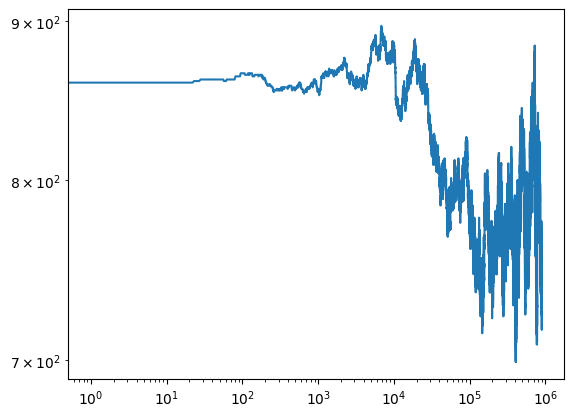

In [152]:
plt.loglog(answers[100000:])

In [111]:
r 

52